<div class="alert alert-info">
<h1>Compare Old and New Voyager EWs</h1>

Robert S. French, rfrench@seti.org - Last updated April 28, 2023

<ul>
<li>We are unclear where the Voyager observations for French (2012) came from. There is a file "SHOWALTER_VOYAGER_PHOT.TAB" that seems like it should have the source data, but it does not have the same number of data points as were shown in the figures.</li>

<li>We have create new Voyager data by navigating, reprojecting, and mosaicing the GEOMED images using the same pipeline used for Cassini.</li>
    
<li>The plots below compare the old data that we have (SHOWALTER_VOYAGER_PHOT.TAB) to this new data.</li>
</ul>    
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mplcursors
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..')
    
from f_ring_util.f_ring import (fit_hg_phase_function,
                                hg_func,
                                limit_by_quant,
                                read_cassini_ew_stats,
                                read_showalter_voyager_ew_stats,
                                read_voyager_ew_stats,
                                scale_hg_phase_function)

%matplotlib notebook

In [2]:
c_obsdata_0_1 = read_cassini_ew_stats('../data_files/cass_ew_0_1.csv')
c_obsdata_0_1_mean = c_obsdata_0_1.groupby('Observation').mean(numeric_only=True)
print()
v1_old_obsdata = read_showalter_voyager_ew_stats('../SHOWALTER_VOYAGER_PHOT_V1.TAB')
print()
v2_old_obsdata = read_showalter_voyager_ew_stats('../SHOWALTER_VOYAGER_PHOT_V2.TAB')
print()
v1_obsdata_0_1 = read_voyager_ew_stats('../data_files/v1_ew_0_1.csv')
print()
v2_obsdata_0_1 = read_voyager_ew_stats('../data_files/v2_ew_0_1.csv')

v1_obsdata_0_1_mean = v1_obsdata_0_1.groupby('Observation').mean(numeric_only=True)
v2_obsdata_0_1_mean = v2_obsdata_0_1.groupby('Observation').mean(numeric_only=True)

** SUMMARY STATISTICS - ../data_files/cass_ew_0_1.csv **
Unique observation names: 210
Total slices: 38467
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27

** SUMMARY STATISTICS - ../SHOWALTER_VOYAGER_PHOT_V1.TAB **
Unique FDS: 25

** SUMMARY STATISTICS - ../SHOWALTER_VOYAGER_PHOT_V2.TAB **
Unique FDS: 42

** SUMMARY STATISTICS - ../data_files/v1_ew_0_1.csv **
Unique observation names: 17
Total slices: 837
Starting date: 1980-11-08 01:13:49
Ending date: 1980-11-17 05:04:13
Time span: 9 days 03:50:24

** SUMMARY STATISTICS - ../data_files/v2_ew_0_1.csv **
Unique observation names: 18
Total slices: 529
Starting date: 1981-08-19 03:36:44
Ending date: 1981-08-29 13:08:28
Time span: 10 days 09:31:44


In [3]:
# Get a phase curve shape to use to match to each set of data
cutoff = 100
obsdata_limited = limit_by_quant(c_obsdata_0_1, cutoff, None)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)

Voyager 1 New / Old: 0.754
Voyager 2 New / Old: 1.151
Old V1 / V2: 2.461
New V1 / V2: 1.613


<IPython.core.display.Javascript object>


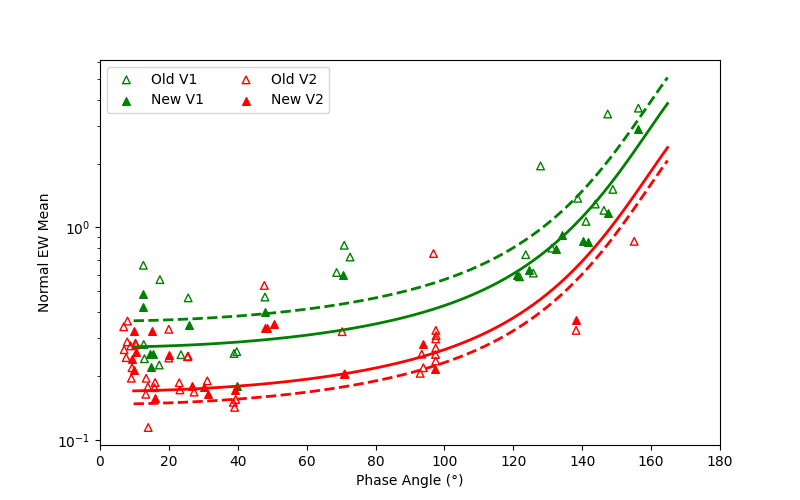

In [4]:
scale_c = scale_hg_phase_function(params_master, c_obsdata_0_1)
scale_v1_old = scale_hg_phase_function(params_master, v1_old_obsdata)
scale_v2_old = scale_hg_phase_function(params_master, v2_old_obsdata)
scale_v1_new = scale_hg_phase_function(params_master, v1_obsdata_0_1_mean)
scale_v2_new = scale_hg_phase_function(params_master, v2_obsdata_0_1_mean)

xrange = np.arange(c_obsdata_0_1['Mean Phase'].min(), c_obsdata_0_1['Mean Phase'].max()+1)
phase_model = hg_func(params_master, xrange)
print(f'Voyager 1 New / Old: {scale_v1_new/scale_v1_old:.3f}')
print(f'Voyager 2 New / Old: {scale_v2_new/scale_v2_old:.3f}')
print(f'Old V1 / V2: {scale_v1_old/scale_v2_old:.3f}')
print(f'New V1 / V2: {scale_v1_new/scale_v2_new:.3f}')

plt.figure(figsize=(8,5))
p1 = plt.scatter(v1_old_obsdata['Mean Phase'], v1_old_obsdata['Normal EW Mean'],
                 marker='^', s=30, color='green', fc='none', label='Old V1')
p2 = plt.scatter(v1_obsdata_0_1_mean['Mean Phase'], v1_obsdata_0_1_mean['Normal EW Mean'],
                 marker='^', s=30, color='green', label='New V1')
p3 = plt.scatter(v2_old_obsdata['Mean Phase'], v2_old_obsdata['Normal EW Mean'],
                 marker='^', s=30, color='red', fc='none', label='Old V2')
p4 = plt.scatter(v2_obsdata_0_1_mean['Mean Phase'], v2_obsdata_0_1_mean['Normal EW Mean'],
                 marker='^', s=30, color='red', label='New V2')
plt.plot(xrange, phase_model*scale_v1_new, '-', color='green', lw=2)
plt.plot(xrange, phase_model*scale_v1_old, '--', color='green', lw=2)
plt.plot(xrange, phase_model*scale_v2_new, '-', color='red', lw=2)
plt.plot(xrange, phase_model*scale_v2_old, '--', color='red', lw=2)
plt.yscale('log')
plt.xlim(0, 180)
plt.xlabel('Phase Angle (°)')
plt.ylabel('Normal EW Mean')
_=plt.legend(ncols=2)